In [1]:
import pandas as pd 
df=pd.read_csv(r'basketOutput.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   period_day       20507 non-null  object
 3   weekday_weekend  20507 non-null  object
 4   month            20507 non-null  int64 
 5   day              20507 non-null  object
 6   hour             20507 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [3]:
import inflect
import calendar
def inputNumber(x):
    return inflect.engine().number_to_words(x)
df['Transaction']=df['Transaction'].apply(inputNumber)
df['hour']=df['hour'].apply(inputNumber)
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [4]:
df

,Transaction,Item,period_day,weekday_weekend,month,day,hour
0,one,bread,morning,weekend,Oct,Sunday,nine
1,two,scandinavian,morning,weekend,Oct,Sunday,ten
2,two,scandinavian,morning,weekend,Oct,Sunday,ten
3,three,hot chocolate,morning,weekend,Oct,Sunday,ten
4,three,jam,morning,weekend,Oct,Sunday,ten
...,...,...,...,...,...,...,...
20502,"nine thousand, six hundred and eighty-two",coffee,afternoon,weekend,Sep,Monday,fourteen
20503,"nine thousand, six hundred and eighty-two",tea,afternoon,weekend,Sep,Monday,fourteen
20504,"nine thousand, six hundred and eighty-three",coffee,afternoon,weekend,Sep,Monday,fourteen
20505,"nine thousand, six hundred and eighty-three",pastry,afternoon,weekend,Sep,Monday,fourteen


In [5]:
df.to_csv('basket.csv')

# Q2

In [65]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from collections import  Counter
from numpy import where
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix,accuracy_score ,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
stu_por=pd.read_csv("student-por.csv",sep=";")
stu_mat=pd.read_csv("student-mat.csv",sep=";")

In [31]:
stu=pd.concat([stu_por,stu_mat])

In [32]:
stu["total_grades"]=(stu["G1"]+stu["G2"]+stu["G3"])/3

In [33]:
stu=stu.drop(["G1","G2","G3"],axis=1)
max=stu["total_grades"].max()
min=stu["total_grades"].min()

In [34]:
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,7.333333
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,10.333333
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12.333333
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14.000000
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,9.000000
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,15.333333
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,8.333333
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,11.000000


In [35]:
#ranging the grade in three parts
def marks(total_grades):
    if(total_grades<7):
        return("low")
    elif(total_grades>=7 and total_grades<14):
        return("average")
    elif(total_grades>=14):
        return("high")
stu["grades"]=stu["total_grades"].apply(marks)

In [36]:
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,total_grades,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,7.333333,average
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,10.333333,average
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12.333333,average
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14.000000,high
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,12.333333,average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,5,5,4,4,5,4,11,9.000000,average
391,MS,M,17,U,LE3,T,3,1,services,services,...,no,2,4,5,3,4,2,3,15.333333,high
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,5,5,3,3,3,3,3,8.333333,average
393,MS,M,18,R,LE3,T,3,2,services,other,...,no,4,4,1,3,4,5,0,11.000000,average


Text(0, 0.5, 'Number of Student')

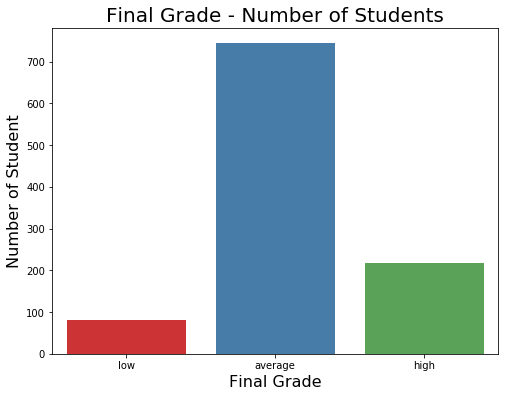

In [37]:
#visualizing the grades
plt.figure(figsize=(8,6))
sns.countplot(stu["grades"], order=["low","average","high"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

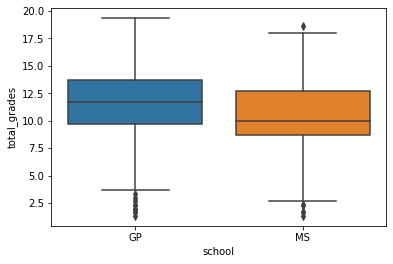

In [38]:
#comparing school with grades
sns.boxplot(x="school", y="total_grades", data=stu)

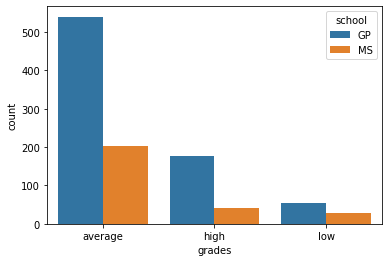

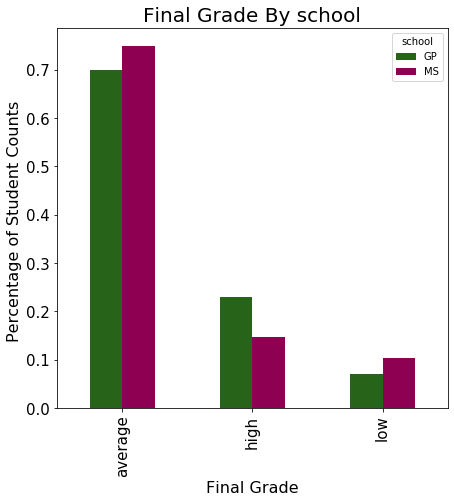

In [39]:
school_counts=stu["school"].value_counts().to_frame()
school_counts.rename(columns={"school":"school_counts"},inplace=True)
school_counts.index.name='school'

school_sns=sns.countplot(hue=stu["school"],x=stu["grades"],data=stu)

#crosstab is expanded form of value counts the the factors inside any variables
perc=(lambda col:col/col.sum())
index=["average","high","low"]
schooltab1=pd.crosstab(columns=stu.school,index=stu.grades)

school_perc=schooltab1.apply(perc).reindex(index)

school_perc.plot.bar(colormap="PiYG_r",fontsize=15,figsize=(7,7))
plt.title('Final Grade By school', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

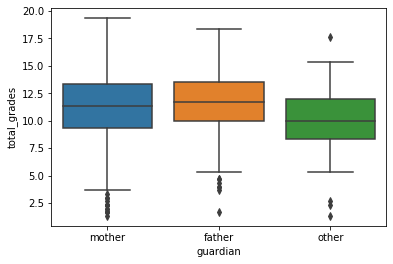

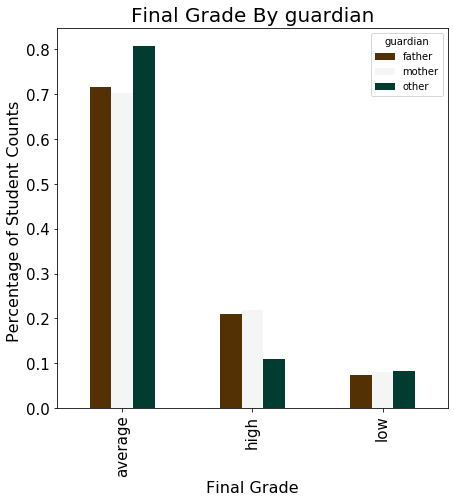

In [40]:
#comparing guardians
sns.boxplot(x="guardian", y="total_grades", data=stu)

guardiantab1=pd.crosstab(columns=stu.guardian,index=stu.grades)
guardian_perc=guardiantab1.apply(perc).reindex(index)
guardian_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By guardian', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#so guardian has grat impact on grades

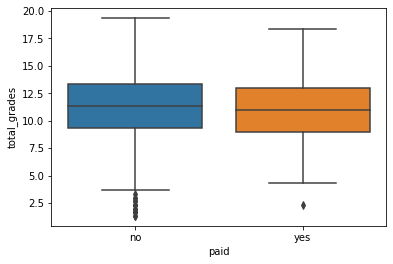

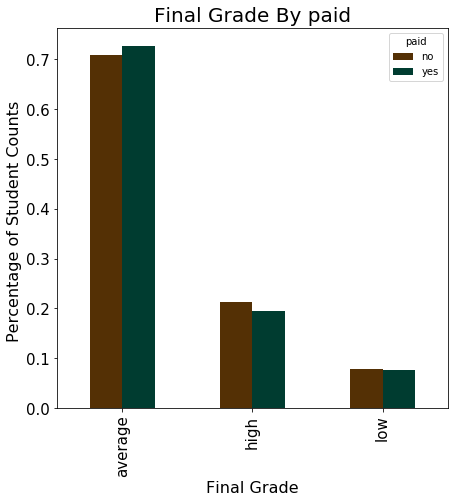

In [41]:
#comparing paid attributes
sns.boxplot(x="paid", y="total_grades", data=stu)
paidtab1=pd.crosstab(columns=stu.paid,index=stu.grades)
paid_perc=paidtab1.apply(perc).reindex(index)
paid_perc.plot.bar(colormap="BrBG",fontsize=15,figsize=(7,7))
plt.title('Final Grade By paid', fontsize=20)
plt.ylabel('Percentage of Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()
#paid does not have much influence on grades so
stu=stu.drop(["paid"],axis=1)




In [42]:
stu.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'total_grades', 'grades'],
      dtype='object')

In [43]:
categorical_features = stu.select_dtypes(include = ["object"]).columns
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'grades'],
      dtype='object')

In [44]:
lbl_train = preprocessing.LabelEncoder() 
for i in categorical_features:
    lbl_train.fit(list(stu[i].values)) # take the values of columns
    stu[i] = lbl_train.transform(list(stu[i].values)) # classify the similar value under same number 

In [45]:
x=stu[['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences']]

y=stu['grades']

In [46]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,3,4,1,1,3,4
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,5,3,3,1,1,3,2
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,4,3,2,2,3,3,6
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,3,2,2,1,1,5,0
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,1,0,0,5,5,4,4,5,4,11
391,1,1,17,1,1,1,3,1,3,3,...,1,1,0,2,4,5,3,4,2,3
392,1,1,21,0,0,1,1,1,2,2,...,1,0,0,5,5,3,3,3,3,3
393,1,1,18,0,1,1,3,2,3,2,...,1,1,0,4,4,1,3,4,5,0


In [47]:
y

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    1
392    0
393    0
394    0
Name: grades, Length: 1044, dtype: int32

### A. Dengeli-balanced ve Dengesiz-unbalanced veriseti kavramını açıklayınız.  Bu durumun sınıflamaya etkilerini ve Synthetic Minority Over-sampling Technique (SMOTE) yöntemini açıklayarak, student performance veriseti için dengeli hale getiriniz.  

In [48]:
counter = Counter(y)
print(counter)

Counter({0: 744, 1: 218, 2: 82})


In [71]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)

In [72]:
counter = Counter(y)
print(counter)

Counter({0: 744, 1: 744, 2: 744})


### B.	Önce dengesiz haliyle, sonra veriyi çoğaltıp dengeli hale getirdiğiniz haliyle Karar ağaçları yöntemi ve Toplulukla öğrenme yöntemleri yöntemlerinden ( Random Forest, Adaboost  gibi)  birini kullanarak sınıflandırma yapınız ve yaptığınız işlemleri açıklayınız.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 49)

In [74]:
modeldt = DecisionTreeClassifier(criterion='entropy',max_features=10,min_samples_leaf=1,min_samples_split=2,random_state=10)
modeldt.fit(X_train, y_train)
predicted = modeldt.predict(X_test)
print("Test accuracy score (with trained model): %.5f" % modeldt.score(X_test, y_test))

Test accuracy score (with trained model): 0.80448


In [75]:
cm = confusion_matrix(y_test, predicted)
print(cm)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

[[147  37  30]
 [ 36 195   7]
 [ 13   8 197]]
0.8044776119402985
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       214
           1       0.81      0.82      0.82       238
           2       0.84      0.90      0.87       218

    accuracy                           0.80       670
   macro avg       0.80      0.80      0.80       670
weighted avg       0.80      0.80      0.80       670



In [76]:
modelrf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, class_weight=None)
modelrf.fit(X_train, y_train)
predicted = modelrf.predict(X_test)
print("Test accuracy score (with trained model): %.5f" % modelrf.score(X_test, y_test))

Test accuracy score (with trained model): 0.88060


In [77]:
cm = confusion_matrix(y_test, predicted)
print(cm)
print(accuracy_score(y_test, predicted))
print(classification_report(y_test, predicted))

[[170  31  13]
 [ 20 212   6]
 [  8   2 208]]
0.8805970149253731
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       214
           1       0.87      0.89      0.88       238
           2       0.92      0.95      0.93       218

    accuracy                           0.88       670
   macro avg       0.88      0.88      0.88       670
weighted avg       0.88      0.88      0.88       670



In [ ]:
oversample = SMOTE(random_state = 101)
x, y = oversample.fit_resample(x, y)